In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [3]:
chembl = pd.read_csv("ChEMBL/ChEMBL3397.csv", sep=";")

In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL5178464,NaN,NaN,378.41,0.0,3.56,21,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,IC50,'>',...,CHEMBL5154826,1,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,NaN,NaN,20.000
1,CHEMBL151096,NaN,NaN,217.27,0.0,3.52,21,CCCCOc1ccc(-c2cocn2)cc1,NT,NaN,...,CHEMBL1145921,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1835784,NaN,NaN,369.51,0.0,3.53,5s,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,IC50,'>',...,CHEMBL1833909,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,30.000
3,CHEMBL1433673,NaN,NaN,NaN,NaN,NaN,SID11112480,NaN,AC50,NaN,...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL1571061,NaN,NaN,498.57,0.0,4.24,SID17384930,Cc1cc(CNC(=O)[C@@H]2C[C@H]2[C@@H](NP(=O)(c2ccc...,AC50,NaN,...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32452,CHEMBL563,FLURBIPROFEN,4.0,244.26,0.0,3.68,FP,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,Drug metabolism,NaN,...,CHEMBL5356989,1,Scientific Literature,RSC Med Chem,2023.0,NaN,DOSE_Lower = 1.0 microM | DOSE_Upper = 5.0 mic...,BINDING AGENT,NaN,NaN
32453,CHEMBL256907,NaN,NaN,513.68,2.0,5.95,1,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,IC50,'=',...,CHEMBL5150068,1,Scientific Literature,J Med Chem,2022.0,NaN,NaN,INHIBITOR,NaN,14.400
32454,CHEMBL376488,BEDAQUILINE,4.0,555.52,2.0,7.13,"1; TMC207,R207910",COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,IC50,'>',...,CHEMBL5113423,1,Scientific Literature,Bioorg Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,10.000
32455,CHEMBL308954,ETRAVIRINE,4.0,435.29,0.0,4.72,ETR; 1,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,IC50,'=',...,CHEMBL5331107,1,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 0.3333 hr,INHIBITOR,NaN,0.277


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            175
Potential missing data             4
Potential transcription error      1
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR        724
SUBSTRATE          6
BINDING AGENT      4
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM              16444
%                3316
uM                313
hr                 13
pmol/min           12
uL/min              9
nmol/min            8
min                 4
/min                3
uL/min/pmol         3
min-1               3
10'-4/min           2
mM                  2
ug.mL-1             2
/min/microM         2
/uM/min             2
ml/min/nmol         1
mL.min-1.g-1        1
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
IC50                           6845
Potency                        3082
Inhibition                     2970
Ki                             1038
Activity                        524
INH                             288
FC                              152
Drug metabolism                 128
TDI                             105
EC50                             36
Stability                        30
Ratio IC50                       19
T1/2                             13
Km                               12
Vmax                             11
CL                               10
IC90                              8
mechanism based inhibition        7
Kinact                            4
NT                                3
Activation                        3
CLH                               3
Ratio                             3
pIC50                             3
Control of P-450 marker           2
Compound recovery                 2
Partition rati

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

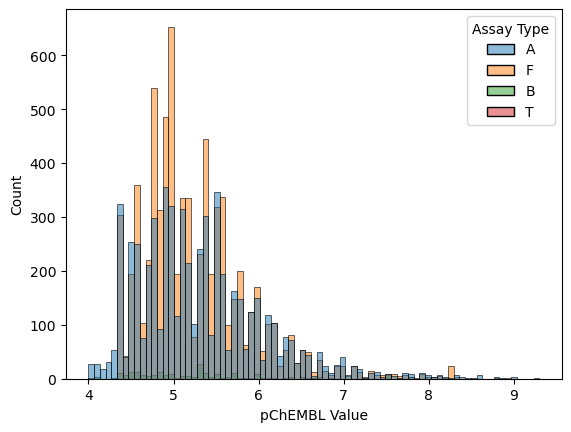

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

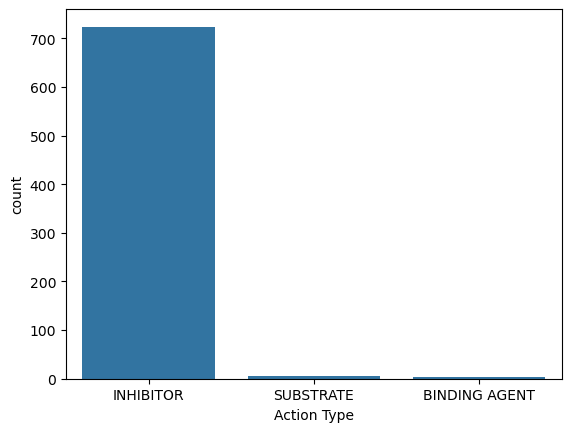

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

26243

In [13]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

2995

In [14]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [16]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32457/32457 [04:17<00:00, 126.07it/s]


In [17]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [18]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32457/32457 [00:08<00:00, 3668.31it/s]


In [19]:
chembl.INCHIKEY.nunique()

25870

In [20]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [21]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [22]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL5178464,NaN,NaN,378.41,0.0,3.56,21,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,IC50,'>',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,NaN,NaN,20.000,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,OHVGZODROPSVRZ-UHFFFAOYSA-N
2,CHEMBL1835784,NaN,NaN,369.51,0.0,3.53,5s,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,IC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,30.000,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,GKEPUTPZCYQUOQ-PBPGXSGUSA-N
4,CHEMBL1571061,NaN,NaN,498.57,0.0,4.24,SID17384930,Cc1cc(CNC(=O)[C@@H]2C[C@H]2[C@@H](NP(=O)(c2ccc...,AC50,NaN,...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cc1cc(CNC(=O)C2C[C@H]2[C@@H](NP(=O)(c2ccccc2)c...,YYRIMQHQEDUOIG-UNQNHFTRSA-N
5,CHEMBL1560884,NaN,NaN,442.42,1.0,-0.44,SID11112552,C=C1c2cccc(O)c2C(=O)C2=C(O)[C@@]3(O)C(=O)C(C(N...,AC50,NaN,...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=C1c2cccc(O)c2C(=O)C2C(=O)[C@@]3(O)C(=O)C(C(N...,QNJKSUYWBCNWFI-HVTPRIGMSA-N
6,CHEMBL1408601,NaN,NaN,219.20,0.0,0.94,SID14723427,CC(=O)c1cnc2c(C(=O)O)cnn2c1C,AC50,NaN,...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(=O)c1cnc2c(C(=O)O)cnn2c1C,CQPZQUIJNFLLJF-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32451,CHEMBL3353354,NaN,NaN,476.58,0.0,4.94,44,O=C1Nc2ccccc2[C@]12C[C@H]2c1ccc2c(/C=C/c3ccc(C...,IC50,'=',...,Scientific Literature,J Med Chem,2015.0,NaN,NaN,NaN,NaN,0.700,O=C1Nc2ccccc2[C@]12C[C@H]2c1ccc2c(C=Cc3ccc(CN4...,RBNRSVPXZPBXCD-QCDSWUKFSA-N
32453,CHEMBL256907,NaN,NaN,513.68,2.0,5.95,1,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,IC50,'=',...,Scientific Literature,J Med Chem,2022.0,NaN,NaN,INHIBITOR,NaN,14.400,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,GSNHKUDZZFZSJB-QUMGSSFMSA-N
32454,CHEMBL376488,BEDAQUILINE,4.0,555.52,2.0,7.13,"1; TMC207,R207910",COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,IC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,10.000,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,QUIJNHUBAXPXFS-XLJNKUFUSA-N
32455,CHEMBL308954,ETRAVIRINE,4.0,435.29,0.0,4.72,ETR; 1,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,IC50,'=',...,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 0.3333 hr,INHIBITOR,NaN,0.277,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,PYGWGZALEOIKDF-UHFFFAOYSA-N


In [23]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
0,CHEMBL5178464,NaN,NaN,378.41,0.0,3.56,21,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,IC50,'>',...,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 0.1667 hr,NaN,NaN,20.000000,COc1cccc(F)c1CNc1ccc(-c2cnc(C)nc2C)c2nncn12,OHVGZODROPSVRZ-UHFFFAOYSA-N
2,CHEMBL1835784,NaN,NaN,369.51,0.0,3.53,5s,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,IC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,30.000000,C[C@@H]1CCCN1CCCOc1ccc(C2=NN(C)C(=O)C3CCCC23)cc1,GKEPUTPZCYQUOQ-PBPGXSGUSA-N
7,CHEMBL2115262,NaN,NaN,322.36,0.0,4.07,3,CO[C@]1(C)C[C@@H](c2ccccc2)c2c(c3ccccc3oc2=O)O1,Ki,'=',...,Scientific Literature,J Med Chem,2000.0,NaN,NaN,NaN,NaN,20.000000,CO[C@]1(C)C[C@@H](c2ccccc2)c2c(c3ccccc3oc2=O)O1,ZGFASEKBKWVCGP-YWZLYKJASA-N
13,CHEMBL1470247,NaN,NaN,266.37,0.0,2.33,SID14726301,CCNC(=O)c1c(NC(C)=O)sc2c1CCCC2,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,17.782794,CCNC(=O)c1c(NC(C)=O)sc2c1CCCC2,XGYASMQMXLNSNV-UHFFFAOYSA-N
14,CHEMBL1564927,NaN,NaN,286.43,0.0,3.59,SID4253853,S=C1N[C@H](c2ccccc2)N[C@H](c2ccccc2)S1,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,1.995262,S=C1N[C@H](c2ccccc2)N[C@H](c2ccccc2)S1,PPCOHTPXMURTDH-KGLIPLIRSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32451,CHEMBL3353354,NaN,NaN,476.58,0.0,4.94,44,O=C1Nc2ccccc2[C@]12C[C@H]2c1ccc2c(/C=C/c3ccc(C...,IC50,'=',...,Scientific Literature,J Med Chem,2015.0,NaN,NaN,NaN,NaN,0.700000,O=C1Nc2ccccc2[C@]12C[C@H]2c1ccc2c(C=Cc3ccc(CN4...,RBNRSVPXZPBXCD-QCDSWUKFSA-N
32453,CHEMBL256907,NaN,NaN,513.68,2.0,5.95,1,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,IC50,'=',...,Scientific Literature,J Med Chem,2022.0,NaN,NaN,INHIBITOR,NaN,14.400000,Cc1nnc(C(C)C)n1[C@H]1C[C@H]2CC[C@@H](C1)N2CC[C...,GSNHKUDZZFZSJB-QUMGSSFMSA-N
32454,CHEMBL376488,BEDAQUILINE,4.0,555.52,2.0,7.13,"1; TMC207,R207910",COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,IC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,10.000000,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,QUIJNHUBAXPXFS-XLJNKUFUSA-N
32455,CHEMBL308954,ETRAVIRINE,4.0,435.29,0.0,4.72,ETR; 1,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,IC50,'=',...,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 0.3333 hr,INHIBITOR,NaN,0.277000,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,PYGWGZALEOIKDF-UHFFFAOYSA-N


In [24]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [25]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1000512     1
CHEMBL1001511    19
CHEMBL1001844     4
CHEMBL1002235     5
CHEMBL1002898     1
                 ..
CHEMBL993583      3
CHEMBL995047     28
CHEMBL996059      1
CHEMBL996337      1
CHEMBL999390     12
Name: Molecule ChEMBL ID, Length: 1747, dtype: int64

In [26]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1000512,1
CHEMBL1001511,19
CHEMBL1001844,4
CHEMBL1002235,5
CHEMBL1002898,1
...,...
CHEMBL993583,3
CHEMBL995047,28
CHEMBL996059,1


In [27]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([   5,    8,   21, 7234,    2,   12, 2897,   29,   19,   32,   11,
          3,    1,    4,   14,   10,   33,   46,    9,   20,   13,   35,
         22,    7,   18,   17,   23,   25,    6,   42,   27,   50,   24,
         15,   28,   43,   31,   16,   67,   38,   85,   45,   30])

In [28]:
N = 10 # assays must have more than N compounds in them 

In [29]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [30]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count
7,CHEMBL2115262,NaN,NaN,322.36,0.0,4.07,3,CO[C@]1(C)C[C@@H](c2ccccc2)c2c(c3ccccc3oc2=O)O1,Ki,'=',...,J Med Chem,2000.0,NaN,NaN,NaN,NaN,20.000000,CO[C@]1(C)C[C@@H](c2ccccc2)c2c(c3ccccc3oc2=O)O1,ZGFASEKBKWVCGP-YWZLYKJASA-N,21
13,CHEMBL1470247,NaN,NaN,266.37,0.0,2.33,SID14726301,CCNC(=O)c1c(NC(C)=O)sc2c1CCCC2,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,17.782794,CCNC(=O)c1c(NC(C)=O)sc2c1CCCC2,XGYASMQMXLNSNV-UHFFFAOYSA-N,7234
14,CHEMBL1564927,NaN,NaN,286.43,0.0,3.59,SID4253853,S=C1N[C@H](c2ccccc2)N[C@H](c2ccccc2)S1,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,1.995262,S=C1N[C@H](c2ccccc2)N[C@H](c2ccccc2)S1,PPCOHTPXMURTDH-KGLIPLIRSA-N,7234
15,CHEMBL1405325,NaN,NaN,286.33,0.0,4.87,SID4253398,Cc1ccc(-c2nnc(-c3ccc4ccccc4c3)o2)cc1,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,5.011872,Cc1ccc(-c2nnc(-c3ccc4ccccc4c3)o2)cc1,QGEPNMGVLCARHP-UHFFFAOYSA-N,7234
16,CHEMBL2004183,NaN,NaN,334.43,0.0,3.20,SID14737405,COc1ccc(/C=N/Nc2snc(SC)c2C#N)cc1OC,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,12.589254,COc1ccc(/C=N/Nc2snc(SC)c2C#N)cc1OC,ZBKLKXXWAJJABZ-LZYBPNLTSA-N,7234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389,CHEMBL416657,NaN,NaN,494.08,1.0,8.01,SID11112048,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)[O-...,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,6.309573,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,QAOAOVKBIIKRNL-UHFFFAOYSA-N,7234
32401,CHEMBL1314130,NaN,NaN,354.58,1.0,5.87,SID11113731,CCCCCCC[n+]1ccc(-c2cc[n+](CCCCCCC)cc2)cc1,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,39.810717,CCCCCCC[n+]1ccc(-c2cc[n+](CCCCCCC)cc2)cc1,XJGZGUSMZSXHJI-UHFFFAOYSA-N,7234
32424,CHEMBL3953660,NaN,NaN,551.00,2.0,5.36,35,COc1cc(-c2ccc(Cl)c(C)c2)c(F)cc1-n1c(=O)ccc2cc(...,IC50,'=',...,J Med Chem,2017.0,NaN,NaN,NaN,NaN,1.200000,COc1cc(-c2ccc(Cl)c(C)c2)c(F)cc1-n1c(=O)ccc2cc(...,UCIPPRMUGOLPEI-UHFFFAOYSA-N,29
32432,CHEMBL4107048,NaN,NaN,232.31,0.0,-0.46,8,CCNC1=N[C@@H]2C[C@H](O)[C@@H](CO)O[C@@H]2S1,IC50,'>',...,J Med Chem,2019.0,NaN,NaN,NaN,NaN,50.000000,CCN=C1N[C@@H]2C[C@H](O)[C@@H](CO)O[C@@H]2S1,WYAROEYZBMXNIZ-ULAWRXDQSA-N,11


In [31]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/tmp/ipykernel_179752/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

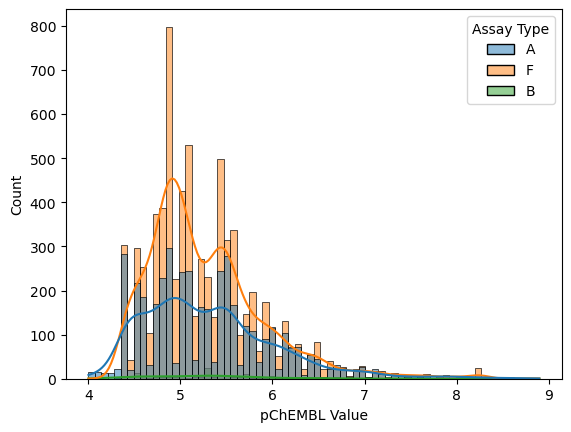

In [32]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

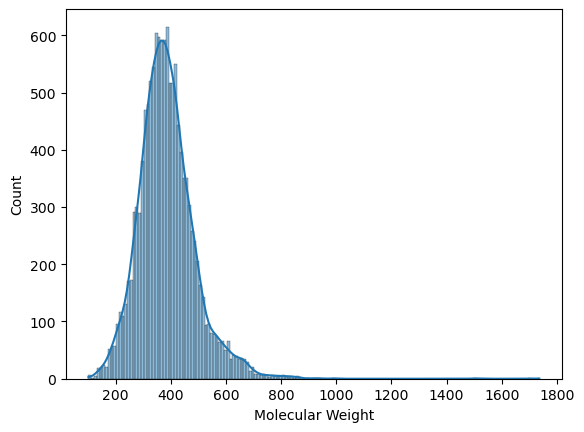

In [33]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [34]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [35]:
assays

117

In [36]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

10190

In [37]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
AABYLPRACHMDSN-BIWBPYCESA-N,2
AABYLPRACHMDSN-REETXPBOSA-N,2
AACPHNFEDMXRPQ-UHFFFAOYSA-N,1
AADUJBXZMSDOOW-UHFFFAOYSA-N,1
AAEXTICMMYDGTO-UHFFFAOYSA-N,1
...,...
ZZVQBBBPXVEEIS-UHFFFAOYSA-N,1
ZZVXVMRMJNDKKA-UHFFFAOYSA-N,1
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1


<Axes: xlabel='assay_count', ylabel='count'>

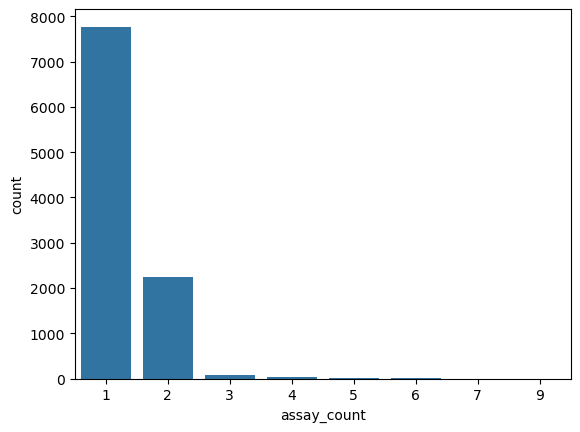

In [38]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [39]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [40]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [41]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,AABYLPRACHMDSN-BIWBPYCESA-N,4.80
1,AABYLPRACHMDSN-REETXPBOSA-N,5.90
2,AACPHNFEDMXRPQ-UHFFFAOYSA-N,5.30
3,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN
4,AAEXTICMMYDGTO-UHFFFAOYSA-N,4.90
...,...,...
10151,ZZVQBBBPXVEEIS-UHFFFAOYSA-N,5.35
10152,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,7.05
10153,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,5.50
10154,ZZZBYLFRFPPGEA-GASCZTMLSA-N,6.12


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

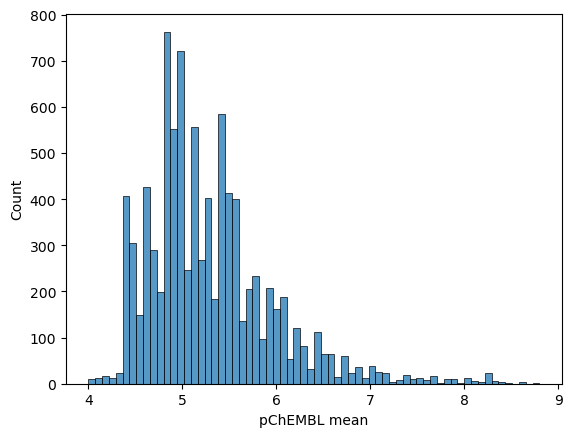

In [42]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [43]:
# join 
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")


In [44]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,AABYLPRACHMDSN-BIWBPYCESA-N,0.0
1,AABYLPRACHMDSN-REETXPBOSA-N,0.0
2,AACPHNFEDMXRPQ-UHFFFAOYSA-N,NaN
3,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN
4,AAEXTICMMYDGTO-UHFFFAOYSA-N,NaN
...,...,...
10151,ZZVQBBBPXVEEIS-UHFFFAOYSA-N,NaN
10152,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,NaN
10153,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,NaN
10154,ZZZBYLFRFPPGEA-GASCZTMLSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

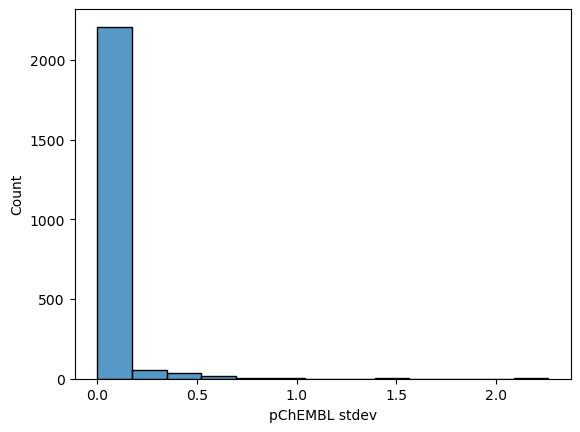

In [45]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [46]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [47]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
26927,CHEMBL364713,NOSCAPINE,4.0,413.43,0.0,2.88,SID11113349,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AC50,'=',...,NaN,NaN,NaN,0.125893,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,7234,9,5.821111,0.662390
1819,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,Sulfaphenazole,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,IC50,'=',...,NaN,NaN,NaN,0.740000,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,11,9,6.605556,0.438039
25469,CHEMBL1109,SULFAPHENAZOLE,4.0,314.37,0.0,2.26,SID11111774,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,AC50,'=',...,NaN,NaN,NaN,0.398107,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,7234,9,6.605556,0.438039
25442,CHEMBL364713,NOSCAPINE,4.0,413.43,0.0,2.88,NOSCAPINE,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,IC50,'=',...,NaN,NaN,NaN,8.177300,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,50,9,5.821111,0.662390
32243,CHEMBL2106732,NOSCAPINE HYDROCHLORIDE,-1.0,449.89,0.0,2.88,SID11112282,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AC50,'=',...,NaN,NaN,NaN,2.511886,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,7234,9,5.821111,0.662390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32061,CHEMBL1330614,NaN,NaN,247.30,0.0,4.09,SID4252536,O=C(Nc1cccc2ccccc12)c1ccccc1,Potency,'=',...,NaN,NaN,NaN,2.511900,O=C(Nc1cccc2ccccc12)c1ccccc1,ALANUUFGKYEMNI-UHFFFAOYSA-N,2897,1,5.600000,NaN
32067,CHEMBL397565,NaN,NaN,164.23,0.0,-0.91,SID4253977,NCCSC[C@H](N)C(=O)O,Potency,'=',...,NaN,NaN,NaN,1.258900,NCCSCC(N)C(=O)O,GHSJKUNUIHUPDF-UHFFFAOYSA-N,2897,1,5.900000,NaN
32080,CHEMBL2325021,NaN,NaN,504.48,1.0,4.48,28,N#Cc1cc(S(=O)(=O)Nc2ncns2)ccc1Oc1ccc(C(F)(F)F)...,IC50,'=',...,NaN,NaN,NaN,2200.000000,N#Cc1cc(S(=O)(=O)Nc2ncns2)ccc1Oc1ccc(C(F)(F)F)...,XURGDBWYPRLMBT-UHFFFAOYSA-N,24,1,5.660000,NaN
32093,CHEMBL3408523,NaN,NaN,423.21,0.0,3.94,2,CC1=CSC(OCC(F)(F)F)(c2ccc(Br)cc2)c2noc(=O)n21,IC50,'=',...,NaN,NaN,NaN,6.600000,CC1=CSC(OCC(F)(F)F)(c2ccc(Br)cc2)c2noc(=O)n21,HXZWMRQMVOIXHQ-UHFFFAOYSA-N,11,1,5.180000,NaN


# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [48]:
pchembl_thresh = 5.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [49]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [50]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)


/tmp/ipykernel_179752/1579042175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [51]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
26927,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE,9,NaN
1819,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6.605556,0.438039,SULFAPHENAZOLE,9,NaN
25469,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6.605556,0.438039,SULFAPHENAZOLE,9,NaN
25442,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE,9,NaN
32243,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE HYDROCHLORIDE,9,NaN


In [52]:
clean_deduped["action_type"].value_counts()

action_type
INHIBITOR    84
Name: count, dtype: int64

In [53]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [54]:
clean_deduped["action_type"].value_counts()

action_type
inhibitor    84
Name: count, dtype: int64

In [55]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

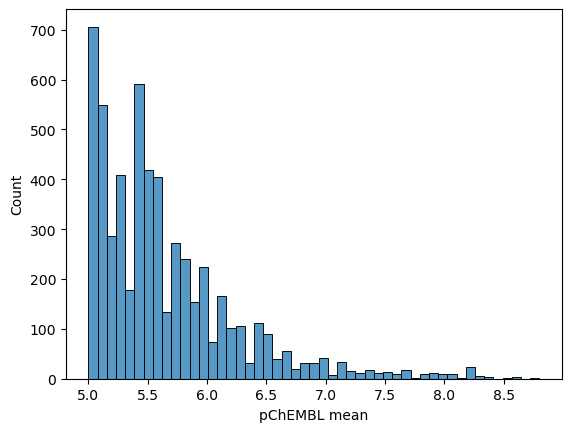

In [56]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [57]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [58]:
L = 1 # compounds must appear in L or more assays

In [59]:


more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1819,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6.605556,0.438039,SULFAPHENAZOLE,9,NaN,ChEMBL_curated,True
32243,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE HYDROCHLORIDE,9,NaN,ChEMBL_curated,True
24692,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.208571,0.575975,QUERCETIN,7,NaN,ChEMBL_curated,True
19784,COc1cc(CNC(=O)CCCC/C=C\C(C)C)ccc1O,YKPUWZUDDOIDPM-VURMDHGXSA-N,5.942857,0.415761,ZUCAPSAICIN,7,NaN,ChEMBL_curated,True
29703,CC1=C(/C=C\C(C)=C\C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,SHGAZHPCJJPHSC-ZCYUIQHQSA-N,5.200000,0.500000,NaN,7,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
17015,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,5.250000,NaN,NaN,1,NaN,ChEMBL_curated,True
17013,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,5.900000,NaN,NaN,1,NaN,ChEMBL_curated,True
17012,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,6.100000,NaN,NaN,1,NaN,ChEMBL_curated,True
17011,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,5.550000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [60]:
more_than_eq_L_assay.INCHIKEY.nunique()

5680

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

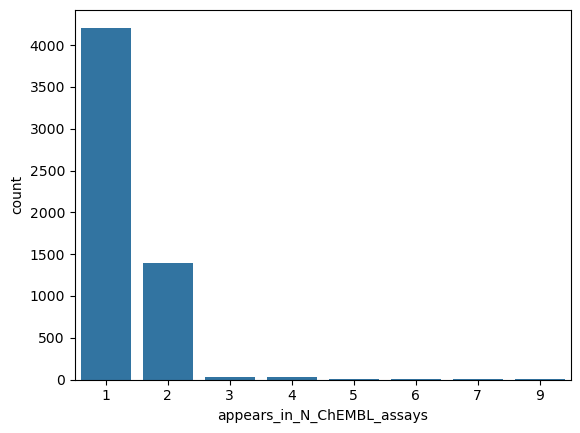

In [61]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

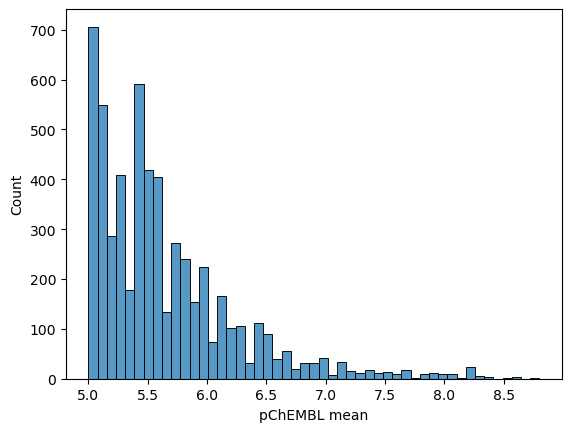

In [62]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [63]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1819,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6.605556,0.438039,SULFAPHENAZOLE,9,NaN,ChEMBL_curated,True
32243,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE HYDROCHLORIDE,9,NaN,ChEMBL_curated,True
24692,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.208571,0.575975,QUERCETIN,7,NaN,ChEMBL_curated,True
19784,COc1cc(CNC(=O)CCCC/C=C\C(C)C)ccc1O,YKPUWZUDDOIDPM-VURMDHGXSA-N,5.942857,0.415761,ZUCAPSAICIN,7,NaN,ChEMBL_curated,True
29703,CC1=C(/C=C\C(C)=C\C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,SHGAZHPCJJPHSC-ZCYUIQHQSA-N,5.200000,0.500000,NaN,7,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
17015,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,5.250000,NaN,NaN,1,NaN,ChEMBL_curated,True
17013,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,5.900000,NaN,NaN,1,NaN,ChEMBL_curated,True
17012,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,6.100000,NaN,NaN,1,NaN,ChEMBL_curated,True
17011,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,5.550000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [64]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
SULFAPHENAZOLE                       1
NOSCAPINE HYDROCHLORIDE              1
QUERCETIN                            1
ZUCAPSAICIN                          1
THIOPERAMIDE                         1
                                    ..
ASARININ                             1
ARCAINE                              1
4',7-DIMETHOXY-5-HYDROXYGENISTEIN    1
(S)-VERAPAMIL                        1
(R)-MICONAZOLE                       1
Name: count, Length: 206, dtype: int64

In [65]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)

In [66]:
more_than_eq_L_assay.action_type.value_counts()

action_type
inhibitor    84
Name: count, dtype: int64